163.0


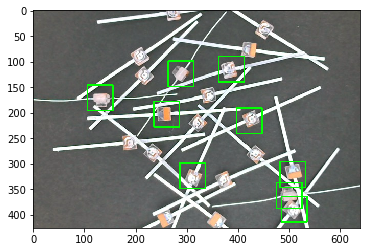

In [18]:
%matplotlib inline
import cv2
#import led_camera
import matplotlib.pyplot as plt
import numpy as np
thresh = 150
max_pixel = 255
size = 25

# 画像の読み込み
#myLed = led_camera.ledCamera(camera=False)
img = cv2.imread("./pic1.jpg")
# フィルタ
#kernel = np.ones((5,5),np.float32)/25
#filter_img = cv2.filter2D(img,-1,kernel)
# 明度のみをグレイスケールに使用

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL) 
h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]
gry_img = v

# 通常のグレイスケール
#gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 青重視
#gry_img = filter_img[:,:,1]

# Otsu法
thresh,bin_img = cv2.threshold(gry_img,0,max_pixel,cv2.THRESH_OTSU)
#ret,bin_img = cv2.threshold(gry_img,thresh,max_pixel,cv2.THRESH_BINARY)
print(thresh)

# ノイズフィルタ
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel,iterations=2)
# 背景
sure_bg = cv2.dilate(opening,kernel,iterations=2)
# 背景からの距離
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# 前景
ret,sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

'''
plt.imshow(img)
plt.show()
plt.imshow(gry_img,cmap='gray')
plt.show()
plt.imshow(bin_img,cmap='gray')
plt.show()
plt.imshow(sure_bg,cmap='gray')
plt.show()
plt.imshow(dist_transform,cmap='gray')
plt.show()

plt.imshow(sure_fg,cmap='gray')
plt.show()
'''



contours, hierarchy = cv2.findContours(
                    sure_fg.astype(np.uint8),
                    cv2.RETR_EXTERNAL, 
                    cv2.CHAIN_APPROX_NONE
                    )
count = 0
for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] < 10:
        continue
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    if cx <= size:
        continue
    if cx >= img.shape[1] - size:
        continue
    if cy <= size:
        continue
    if cy >= img.shape[0] - size:
        continue

    x0 = cx - size
    x1 = cx + size
    y0 = cy - size
    y1 = cy + size
    cv2.rectangle(img,(x0,y0),(x1,y1),(0,255,0),thickness=2)
    '''
    cut_img = img[y0:y1,x0:x1]
    cut_img = cv2.resize(cut_img,(32,32))
    plt.imshow(cut_img)
    plt.show()
    '''
    count += 1

plt.imshow(img)
plt.show()